[*********************100%%**********************]  1 of 1 completed


Text(0.5, 1.0, 'AAPL EMA Crossover')

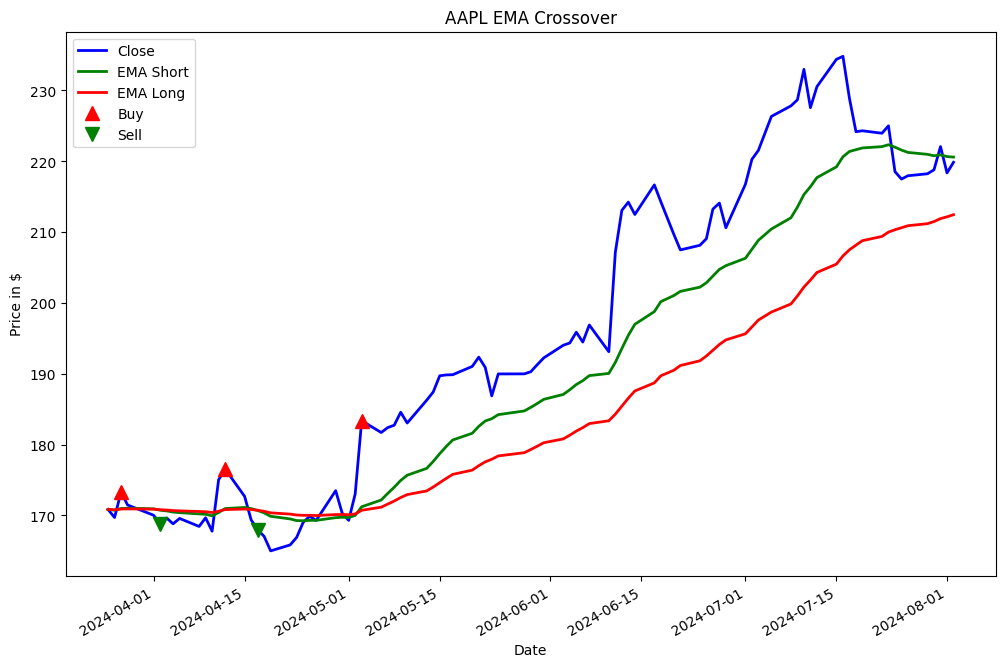

In [3]:
#import the necessary packages
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#download the historical stock data
aapl_df = yf.download("AAPL", start="2024-03-24", end="2024-08-3")



aapl_df['ema_short'] = aapl_df['Close'].ewm(span=21, adjust=False).mean()
aapl_df['ema_long'] = aapl_df['Close'].ewm(span=50, adjust=False).mean()



aapl_df['bullish'] = 0.0
aapl_df['bullish'] = np.where(aapl_df['ema_short'] > aapl_df['ema_long'], 1.0, 0.0)
aapl_df['crossover'] = aapl_df['bullish'].diff()



fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111, ylabel='Price in $')

aapl_df['Close'].plot(ax=ax1, color='b', lw=2.)
aapl_df['ema_short'].plot(ax=ax1, color='g', lw=2.)
aapl_df['ema_long'].plot(ax=ax1, color='r', lw=2.)

ax1.plot(aapl_df.loc[aapl_df.crossover == 1.0].index, 
         aapl_df.Close[aapl_df.crossover == 1.0],
         '^', markersize=10, color='r')
ax1.plot(aapl_df.loc[aapl_df.crossover == -1.0].index, 
         aapl_df.Close[aapl_df.crossover == -1.0],
         'v', markersize=10, color='g')
plt.legend(['Close', 'EMA Short', 'EMA Long', 'Buy', 'Sell'])
plt.title('AAPL EMA Crossover')